# introduction to Keras


![keras logo](img/keras-logo.png)

Igor Zubrycki

igorzubrycki@gmail.com

# Keras is a **Python** **Deep Learning** library

 - Q1: Who knows what deep learning is?
 - Q2: Who used deep learning
 - Q3: Who uses deep learning in ongoing (large) project / finished such


# LEARNING
as in  Machine *Learning*

How do we use previous experience/ data to decide in new situations/ using new data



Problems:

How we qualify data?
- classification
- regression

How we divide/ describe data?
 -  unsupervised learning
 - encoding (autoencoders, GAN's ...)

How we move to forward towards a (far) goal
- reinforced learning

# Neural Networks

## ( This is what will be deep)

Two parts:

 - Network: connect results of various calculations in meaningfull way
 - Neural: parts of neural network structure act is similar ways as neurons do

# Neural Network ZOO

![](img/nn_zoo.jpg)

# So Neural Networks used to suck

 - Computationaly heavy
 - Low interpretability
 - Little of no guarantees of stability/ generalizability
 

# Enter the Deep learning

It turns out that by stacking (tens) of "layers" and using right computatational blocks results can be very good

## Given big data and computational resources to train on this data

### Deep means the number of layers
![](img/imagenet_vgg16.png)

VGG16


![](img/imagenet_xception_flow.png)

# Feature learning -- conectivism

![](img/recognize_dog.png)

Source: https://ml.berkeley.edu/blog/assets/tutorials/3/recognize%20dog%20neural%20network.png

One of reasons of the current deep learning explosion is the tooling

How to do it at all (MATLAB ...) -> How to do it on GPU's (Torch, Caffe) --> In python (Theano, Tensorflow) -> How to do it pleasanly (Lasagne, Keras, pytorch ...)  -> How to do it in production (Keras ?? Tensorflow, mxnet)


" Żmudna i nudna otoczka stanowiąca 90% projektu"

In general Deep Neural Networks require:
    - Large data sets
    - (extremely) Long computations or (extremaly) large computational resources


Keras helps handle the data and provides tools for handling the computation process

# Let's do an example

### We will first play with fashion MNIST a simple benchmark but for fashion


In [9]:
from keras.datasets import fashion_mnist

#download an example dataset - Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)


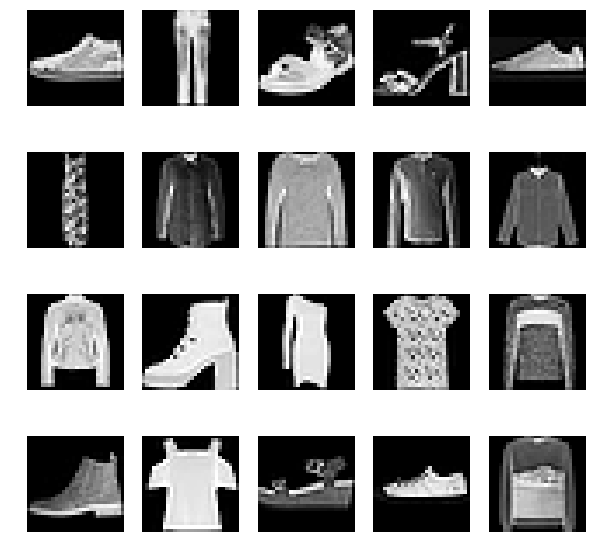

In [69]:
%matplotlib inline

import pylab as plt
import random
def show_fashion(n_rows =4,n_cols=5):
    fig = plt.figure()

    fig.tight_layout()
    fig.set_size_inches((0.5,0.5))
    n_images=n_rows*n_cols
    for y in range(n_images):
            new_plot=fig.add_subplot(n_rows,n_cols,y+1)
            el=random.randint(0,len(x_train))
            #print(el)
            plt.imshow(x_train[el,:,:], cmap='gray')
            plt.axis("off")

    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.savefig("img/fashion.jpg")
    plt.show()
show_fashion()

![](img/fashion.jpg)

### Which piece of clothing this is?

Choose from: 

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

Results with classical ML methods (max 0.897  for Support Vector Classification, 0.888 GradientBoostingClassifier, RandomForestClassifier 0.879) *Human performance* 0.835 (Crowd-sourced evaluation of human (with no fashion expertise) performance. 1000 randomly sampled test images, 3 labels per image, majority labelling.) [Fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
### Lets load and prepare data 


In [118]:
from keras import backend as K
import keras

img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [120]:
### We need also to prepare y -- one hot encoding
num_classes=10
y_train_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_hot = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0],y_train_hot[0])

print(y_train[100],y_train_hot[100])

9 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
8 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


### Lets become network architects





In [111]:
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.models import Model

inputs = Input(shape=(28,28,1)) #one color
conv= Conv2D(64, (3,3), activation='relu')(inputs)
conv= Conv2D(32, (3,3), activation='relu')(conv)
pool= MaxPooling2D(pool_size=(2,2))(conv)
dropout=Dropout(0.25)(pool)

flatten=Flatten()(pool)
output=Dense(10, activation="softmax")(flatten)



In [112]:
model= Model(inputs=inputs, outputs=output)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [115]:
history=model.fit(x_train,y_train_hot, batch_size=256, validation_data=(x_test,y_test_hot), epochs=3)

## yay, our non-deep deep learning model achieved around SOTA for non DL models ;)



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 151s 3ms/step - loss: 0.3322 - acc: 0.8816 - val_loss: 0.3584 - val_acc: 0.8651
Epoch 2/3
60000/60000 [==============================] - 148s 2ms/step - loss: 0.2897 - acc: 0.8969 - val_loss: 0.3411 - val_acc: 0.8803
Epoch 3/3
60000/60000 [==============================] - 148s 2ms/step - loss: 0.2622 - acc: 0.9064 - val_loss: 0.2777 - val_acc: 0.9022


In [133]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

    Sneaker       0.81      0.91      0.86      1000
     Sandal       0.99      0.97      0.98      1000
 Ankle boot       0.84      0.84      0.84      1000
    Trouser       0.90      0.92      0.91      1000
      Shirt       0.80      0.88      0.84      1000
T-shirt/top       0.98      0.98      0.98      1000
        Bag       0.82      0.62      0.71      1000
       Coat       0.94      0.98      0.96      1000
   Pullover       0.97      0.98      0.97      1000
      Dress       0.99      0.94      0.96      1000

avg / total       0.90      0.90      0.90     10000

Normalized confusion matrix


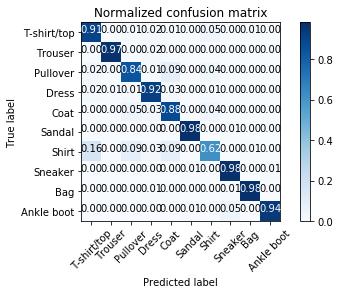

In [134]:
from sklearn.metrics import classification_report
predicted_classes= model.predict(x_test)
predicted_to_cat=np.argmax(predicted_classes, axis=1)
target_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
names_dict=dict(zip(target_names,range(10)))
print(classification_report(y_test, predicted_to_cat, target_names=names_dict))



Normalized confusion matrix


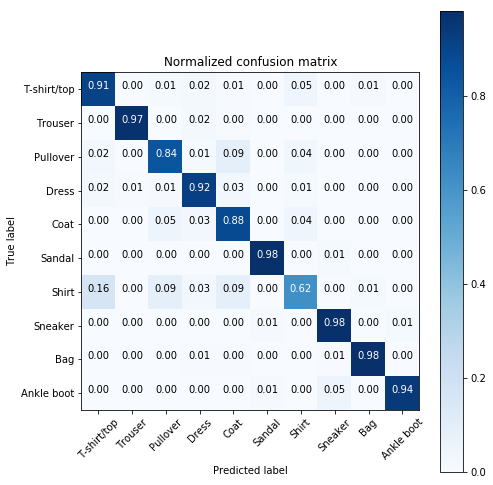

In [137]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predicted_to_cat)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [138]:
def deeper(prev_layer,dropout_level=0.5):
    conv= Conv2D(32, (3,3), activation='relu')(prev_layer)
    conv= Conv2D(32, (3,3), activation='relu')(conv)
    pool= MaxPooling2D(pool_size=(2,2))(conv)
    dropout=Dropout(dropout_level)(pool)
    return pool
    

In [139]:
inputs = Input(shape=(28,28,1)) #one color
d1=deeper(inputs)
d2=deeper(d1)
flatten=Flatten()(d2)
dense1=Dense(128, activation="relu")(flatten)
dropout=Dropout(0.4)(dense1)
final=Dense(num_classes,activation="softmax")(dropout)

model_deeper= Model(inputs=inputs, outputs=final)
model_deeper.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



In [143]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                46090     
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
_________________________________________________________________


In [142]:
history2=model_deeper.fit(x_train,y_train_hot, batch_size=256, validation_data=(x_test,y_test_hot), epochs=10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3250 - acc: 0.8828 - val_loss: 0.3273 - val_acc: 0.8776
Epoch 2/6
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2972 - acc: 0.8929 - val_loss: 0.2785 - val_acc: 0.8996
Epoch 3/6
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2761 - acc: 0.8993 - val_loss: 0.2811 - val_acc: 0.8947
Epoch 4/6
60000/60000 [==============================] - 85s 1ms/step - loss: 0.2599 - acc: 0.9068 - val_loss: 0.2792 - val_acc: 0.8973
Epoch 5/6
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2448 - acc: 0.9116 - val_loss: 0.2675 - val_acc: 0.9021
Epoch 6/6
49152/60000 [=======================>......] - ETA: 14s - loss: 0.2346 - acc: 0.9164

KeyboardInterrupt: 

### Let's use re-learning 

From "ImageNet Training in Minutes": Finishing 90-epoch ImageNet-1k training with ResNet-50 on a NVIDIA M40 GPU takes 14 days. 

Authors used 1.2 M USD

Let's save some money!

In [167]:
from keras.applications.mobilenet import MobileNet
from keras.layers import Lambda

inputs = Input(shape=(128,128,3)) #one color

base_model = MobileNet(input_shape=(128,128,3), include_top=False, pooling='avg')(inputs)
output = Dropout(0.5)(base_model.output)
predict = Dense(num_classes, activation='softmax')(output)

model = Model(inputs=input_image, outputs=predict)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

AttributeError: 'Tensor' object has no attribute 'output'

In [385]:
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.layers import Input,Dense,Dropout,Lambda
from keras.models import Model
from keras import backend as K

height,width = 56,56

#input_image = Input(shape=(128,128,3), name="image_input")

base_model =VGG16(include_top=False, pooling='avg', input_shape=(48,48,3),weights='imagenet')
output = Dropout(0.5)(base_model.output)
predict = Dense(10, activation='softmax')(output)

model = Model(inputs=base_model.input, outputs=predict)
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_99 (InputLayer)        (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [188]:
#for layer in base_model.layers:
#    layer.trainable = False
for layer in model.layers:
    layer.trainable=False
    #print(layer.name)

model.layers[-1].trainable=True
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [375]:
from skimage.transform import resize

from functools import partial

def resize_images(image_structure,output_shape=(48,48)):
    resize_func=partial(resize,output_shape=output_shape)
    x,y=output_shape
    resized=np.zeros((len(image_structure),x,y))

    for num in range(len(image_structure)):
        resized[num,:,:]=resize_func(image_structure[num,:,:])
    return resized   
def make_rgb(image_structure):
    ll,w,h=image_structure.shape
    rgb_array=np.zeros((ll,w,h,3))
    
    normalized=image_structure
    
    rgb_array[...,0]=normalized
    rgb_array[...,1]=normalized
    rgb_array[...,2]=normalized
    return rgb_array


In [376]:
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()




x_train_rgb=make_rgb(resize_images(x_train))
x_test_rgb=make_rgb(resize_images(x_test))

print(x_train_rgb.shape)
print(x_test_rgb.shape)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [378]:
# first bottleneck

from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16




#input_image = Input(shape=(128,128,3), name="image_input")

base_model =VGG16(include_top=False, pooling=None, input_shape=(48,48,3))
features=base_model.predict(x_train_rgb, batch_size=100, verbose=1)

60000/60000 [==============================] - 1170s 20ms/step


In [379]:
np.save('features_train.npy',features)


In [380]:
features_test=base_model.predict(x_test_rgb, batch_size=100, verbose=1)
np.save('features_test.npy',features_test)


10000/10000 [==============================] - 195s 19ms/step


In [381]:
features_test.shape

(10000, 1, 1, 512)

In [382]:
# super simple model using the features

inputs_features = Input(shape=(1,1,512)) 
flatten=Flatten()(inputs_features)
fc=Dense(20, activation="relu")(flatten)
dropout=Dropout(0.5)(fc)
predict = Dense(10, activation='softmax')(dropout)

model_bottleneck = Model(inputs=inputs_features, outputs=predict)
model_bottleneck.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_bottleneck.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_98 (InputLayer)        (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 20)                10260     
_________________________________________________________________
dropout_51 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 10)                210       
Total params: 10,470
Trainable params: 10,470
Non-trainable params: 0
_________________________________________________________________


In [384]:

#features_l=np.expand_dims(features,-1)
#features_l=np.expand_dims(features_l,-1)
#features_l.shape
model_bottleneck.fit(features,y_train_hot, batch_size=500, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7326 - acc: 0.7335
Epoch 2/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7320 - acc: 0.7322
Epoch 3/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7250 - acc: 0.7378
Epoch 4/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7192 - acc: 0.7390
Epoch 5/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7122 - acc: 0.7408
Epoch 6/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7048 - acc: 0.7436
Epoch 7/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6989 - acc: 0.7469
Epoch 8/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6968 - acc: 0.7473
Epoch 9/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6921 - acc: 0.7478
Epoch 10/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6862 - a

60000/60000 [==============================] - 1s 10us/step - loss: 0.6215 - acc: 0.7732
Epoch 82/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6188 - acc: 0.7747
Epoch 83/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6169 - acc: 0.7759
Epoch 84/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6199 - acc: 0.7749
Epoch 85/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6185 - acc: 0.7754
Epoch 86/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6153 - acc: 0.7770
Epoch 87/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6157 - acc: 0.7756
Epoch 88/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6169 - acc: 0.7740
Epoch 89/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6175 - acc: 0.7744
Epoch 90/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.6188 - acc: 

ValueError: Error when checking target: expected dense_73 to have 3 dimensions, but got array with shape (60000, 10)

### " Nudne i żmudne"

 1. Data preprocessing, text, sequence and *image* preprocessing
 2. Inspection and raporting the learning process
 3. Modyfing the learning process
 4. Using in production

## Data preprocessing:

 -> Encode images and their labels
 -> Pipeline images through pre processing data-augmentation
 -> In case of text, seqences : encode, filter,tokenize  normalize 

## Inspecting

Using Keras *callbacks* during the learning process:
    
    - Loggers & monitors: base history, TensorBoard, CSVLogger


## Modyfing

ReduceLROnPlateau
LearningRateScheduler
EarlyFinisher

## Using in production

Keras models with TensorFlow backend 
Tensorflow can be set up with TensorFLow Serving

Keras models can also be used in smartphone application 

also, webpages K